## 1. Business understanding, problem
 **Business Understanding**

Customer retention is a critical driver of profitability in the e-commerce sector. The business is currently experiencing a measurable decline in user engagement, with a growing number of customers ceasing to place orders or interact with the platform. This trend poses a direct threat to long-term revenue and customer lifetime value.
To address this, the company seeks to implement a data-driven approach to identify at-risk users, understand the behavioral factors contributing to churn, and design targeted interventions that improve retention outcomes.



 **Business Problem**

The core business challenge is to reduce customer churn by leveraging historical user data. Specifically, the project aims to:
- Predict churn likelihood using machine learning models trained on behavioral and transactional attributes.
- Segment churned users into distinct behavioral groups to enable tailored re-engagement strategies.
- Generate actionable insights that inform marketing, product, and customer service initiatives focused on retention.
Success will be measured by the model’s predictive accuracy, the clarity of segmentation outputs, and the effectiveness of targeted campaigns in reducing churn rates


## 2. Data understading, preparation, exploration


### *2.1. Data Preparation*

In [2]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
records = pd.read_excel("/content/drive/MyDrive/FinalProject/Final_project_Statistics/churn_prediction.xlsx")
print(records)

print("records", records.shape)


      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          52869      0    20.0         Mobile Phone         3   
1          52942      0    13.0             Computer         1   
2          52972      0    16.0         Mobile Phone         3   
3          53125      0     5.0         Mobile Phone         1   
4          53367      0     9.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55535      0    61.0         Mobile Phone         3   
5626       55538      0    23.0             Computer         1   
5627       55562      0    29.0         Mobile Phone         2   
5628       55598      0    13.0             Computer         1   
5629       55604      0    16.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 7.0             E wallet  Female             4.0   
1                 9.0     Cash on Delivery  Female             4.0 

###*2.2.Checking Data And Understading*

####2.2.1.Checking the data type and missing value


In [5]:
def data_overview(data, name=""):
    print("\n---", name, "---")
    print("Shape:", data.shape)
    print("Dtypes:\n", data.dtypes)
    print("\nMissing values:\n", data.isnull().sum())
    print("\nUnique values per column:\n", data.nunique())

data_overview(records, "Overview Data")



--- Overview Data ---
Shape: (5630, 20)
Dtypes:
 CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

Missing values:
 CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             

####2.2.2.Getting the unique value of each attribute

In [6]:
# Loop through each column and print unique count and values
for col in records.columns:
    print(f"Column: {col}")
    print(f"→ Unique values count: {records[col].nunique()}")
    print(f"→ Unique values: {records[col].unique()}")
    print('-' * 50)

Column: CustomerID
→ Unique values count: 5630
→ Unique values: [52869 52942 52972 ... 55562 55598 55604]
--------------------------------------------------
Column: Churn
→ Unique values count: 2
→ Unique values: [0 1]
--------------------------------------------------
Column: Tenure
→ Unique values count: 36
→ Unique values: [20. 13. 16.  5.  9.  1. 18. 23.  6.  8. 22.  7.  2. 11.  4. 19. 12. 15.
  0. 17. nan 21. 27. 10.  3. 14. 25. 51. 31. 50. 30. 28. 26. 24. 29. 60.
 61.]
--------------------------------------------------
Column: PreferredLoginDevice
→ Unique values count: 3
→ Unique values: ['Mobile Phone' 'Computer' 'Phone']
--------------------------------------------------
Column: CityTier
→ Unique values count: 3
→ Unique values: [3 1 2]
--------------------------------------------------
Column: WarehouseToHome
→ Unique values count: 34
→ Unique values: [  7.   9.  16.  28.  36.  17.  10.  14.  11.  23.  30.   8.   6.  15.
  27.  nan  35.  13.  22.  26.  32.  21.  19.  31.  12.

Here, we can see that "Mobile Phone" and "Mobile" in PreferredLoginDevice and PreferedOrderCat have the same meaning as well as "Cash on Delivery" - "COD" and "Credit Card" - "CC" in PreferredaymentMode. This needs to be handeled before moving further.

##2.2.3.Unifying values


In [7]:
# Unifying values in PreferredLoginDevice and PreferedOrderCat
records['PreferredLoginDevice'] = records['PreferredLoginDevice'].replace({
    'Phone': 'Mobile Phone'
})
records['PreferedOrderCat'] = records['PreferedOrderCat'].replace({
    'Mobile': 'Mobile Phone'
})

# Unifying values in PreferredPaymentMode
records['PreferredPaymentMode'] = records['PreferredPaymentMode'].replace({
    'COD': 'Cash on Delivery',
    'CC': 'Credit Card'
})

In [8]:
# Loop through each column and print unique count and values
for col in records.columns:
    print(f"Column: {col}")
    print(f"→ Unique values count: {records[col].nunique()}")
    print(f"→ Unique values: {records[col].unique()}")
    print('-' * 50)

Column: CustomerID
→ Unique values count: 5630
→ Unique values: [52869 52942 52972 ... 55562 55598 55604]
--------------------------------------------------
Column: Churn
→ Unique values count: 2
→ Unique values: [0 1]
--------------------------------------------------
Column: Tenure
→ Unique values count: 36
→ Unique values: [20. 13. 16.  5.  9.  1. 18. 23.  6.  8. 22.  7.  2. 11.  4. 19. 12. 15.
  0. 17. nan 21. 27. 10.  3. 14. 25. 51. 31. 50. 30. 28. 26. 24. 29. 60.
 61.]
--------------------------------------------------
Column: PreferredLoginDevice
→ Unique values count: 2
→ Unique values: ['Mobile Phone' 'Computer']
--------------------------------------------------
Column: CityTier
→ Unique values count: 3
→ Unique values: [3 1 2]
--------------------------------------------------
Column: WarehouseToHome
→ Unique values count: 34
→ Unique values: [  7.   9.  16.  28.  36.  17.  10.  14.  11.  23.  30.   8.   6.  15.
  27.  nan  35.  13.  22.  26.  32.  21.  19.  31.  12.  29.  2

###*2.3.Checking And Handling Missing Data*

In [9]:
num_cols = records.select_dtypes(include=np.number).columns
imp_mean = SimpleImputer(strategy="mean")
records[num_cols] = imp_mean.fit_transform(records[num_cols])

# Categorical → most frequent
cat_cols = records.select_dtypes(exclude=np.number).columns
imp_mode = SimpleImputer(strategy="most_frequent")
records[cat_cols] = imp_mode.fit_transform(records[cat_cols])

In [10]:
print("Total missing values:", records.isnull().sum().sum())

Total missing values: 0


In [11]:
le = LabelEncoder()
for col in records.columns:
    if records[col].dtype == "object":
        records[col] = le.fit_transform(records[col])


In [12]:
# Explicitly define categorical columns
categorical_cols = [
    "PreferredLoginDevice",
    "PreferredPaymentMode",
    "PreferedOrderCat",
    "MaritalStatus",
    "Gender"
]

# Define numerical columns as all others (excluding ID and target)
numerical_cols = [
    col for col in records.columns
    if col not in categorical_cols + ["CustomerID", "Churn"]
]


##3. EDA Analysis


###*3.1.Univariate analysis*

In [29]:
# Define mapping dictionaries
category_mappings = {
    "PreferredLoginDevice": {
        0: "Computer",
        1: "Mobile"
    },
    "PreferredPaymentMode": {
        0: "Debit Card",
        1: "Credit Card",
        2: "Cash on Delivery",
        3: "Net Banking",
        4: "UPI"
    },
    "PreferedOrderCat": {
        0: "Laptop & Accessories",
        1: "Mobile",
        2: "Fashion",
        3: "Grocery",
        4: "Others"
    },
    "MaritalStatus": {
        0: "Single",
        1: "Married",
        2: "Divoced"
    },
    "Gender": {
        0: "Male",
        1: "Female"
    }
}

# Apply mappings to the dataset
for col, mapping in category_mappings.items():
    records[col] = records[col].map(mapping)

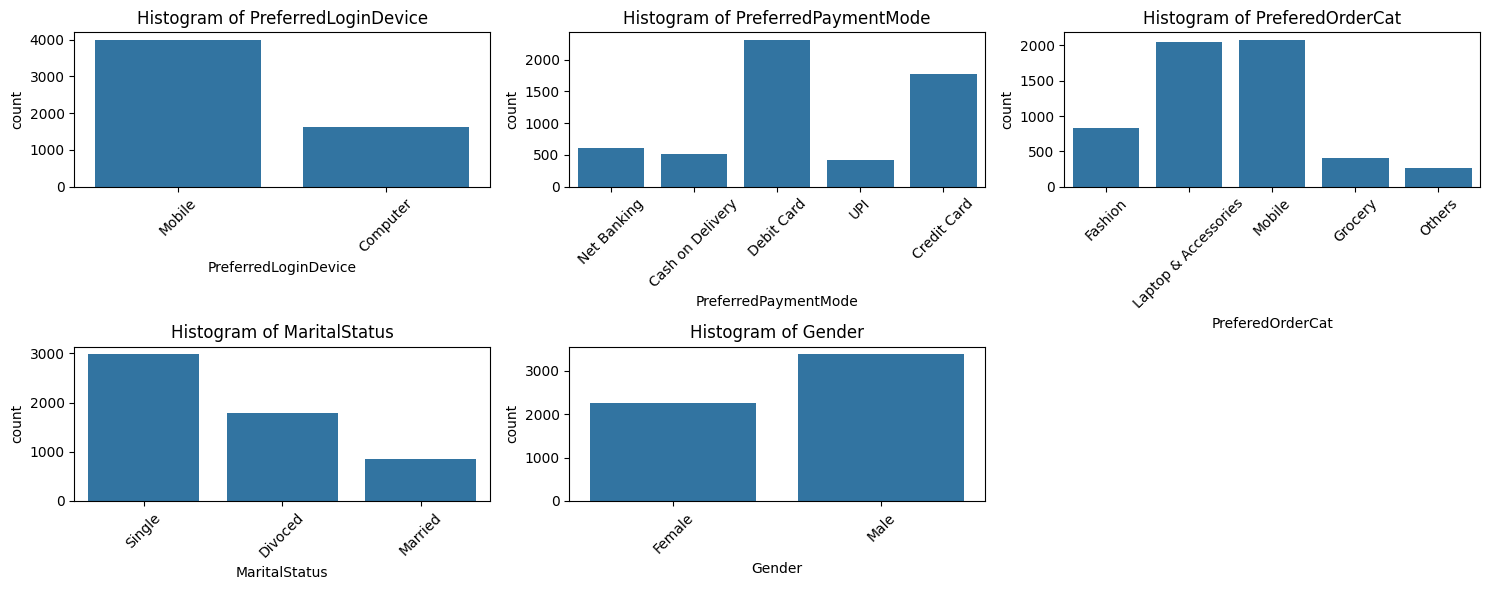

In [30]:
### 🔹 Plot Categorical Variables (Clean x-axis labels)
n_cols_cat = 3
n_rows_cat = (len(categorical_cols) + n_cols_cat - 1) // n_cols_cat
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(5 * n_cols_cat, 3 * n_rows_cat))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_cols):
    # Convert values to string and ensure proper label handling
    records[col] = records[col].astype(str)
    sns.countplot(data=records, x=col, ax=axes_cat[i])
    axes_cat[i].set_title(f"Histogram of {col}")
    axes_cat[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.show()

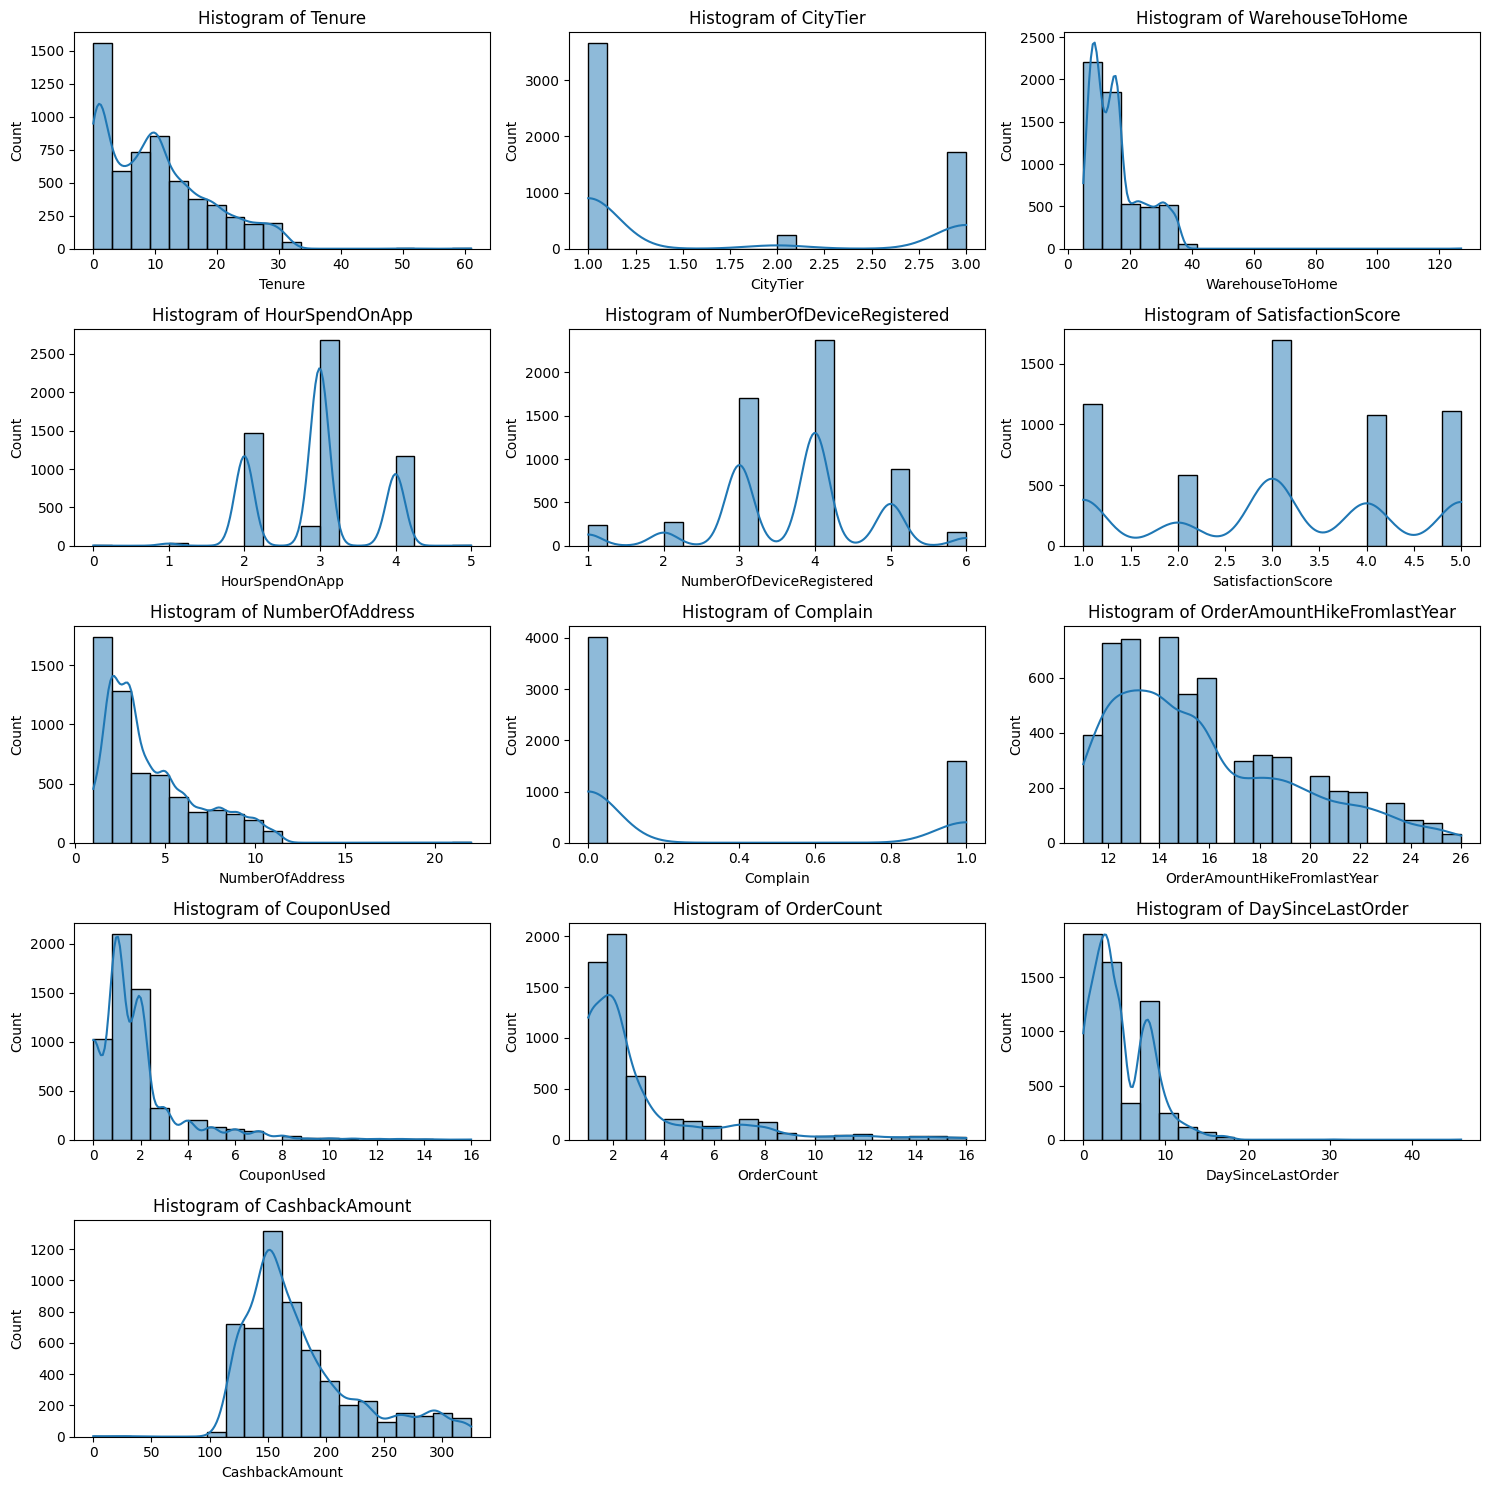

In [20]:
# Plot numerical variables
n_cols_num = 3
n_rows_num = (len(numerical_cols) + n_cols_num - 1) // n_cols_num
fig_num, axes_num = plt.subplots(n_rows_num, n_cols_num, figsize=(5 * n_cols_num, 3 * n_rows_num))
axes_num = axes_num.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(records[col], kde=True, bins=20, ax=axes_num[i])
    axes_num[i].set_title(f"Histogram of {col}")
    axes_num[i].set_xlabel(col)
    axes_num[i].set_ylabel("Count")

# Remove unused subplots
for j in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[j])

plt.tight_layout()
plt.show()


###*3.2.Bivariate analysis*

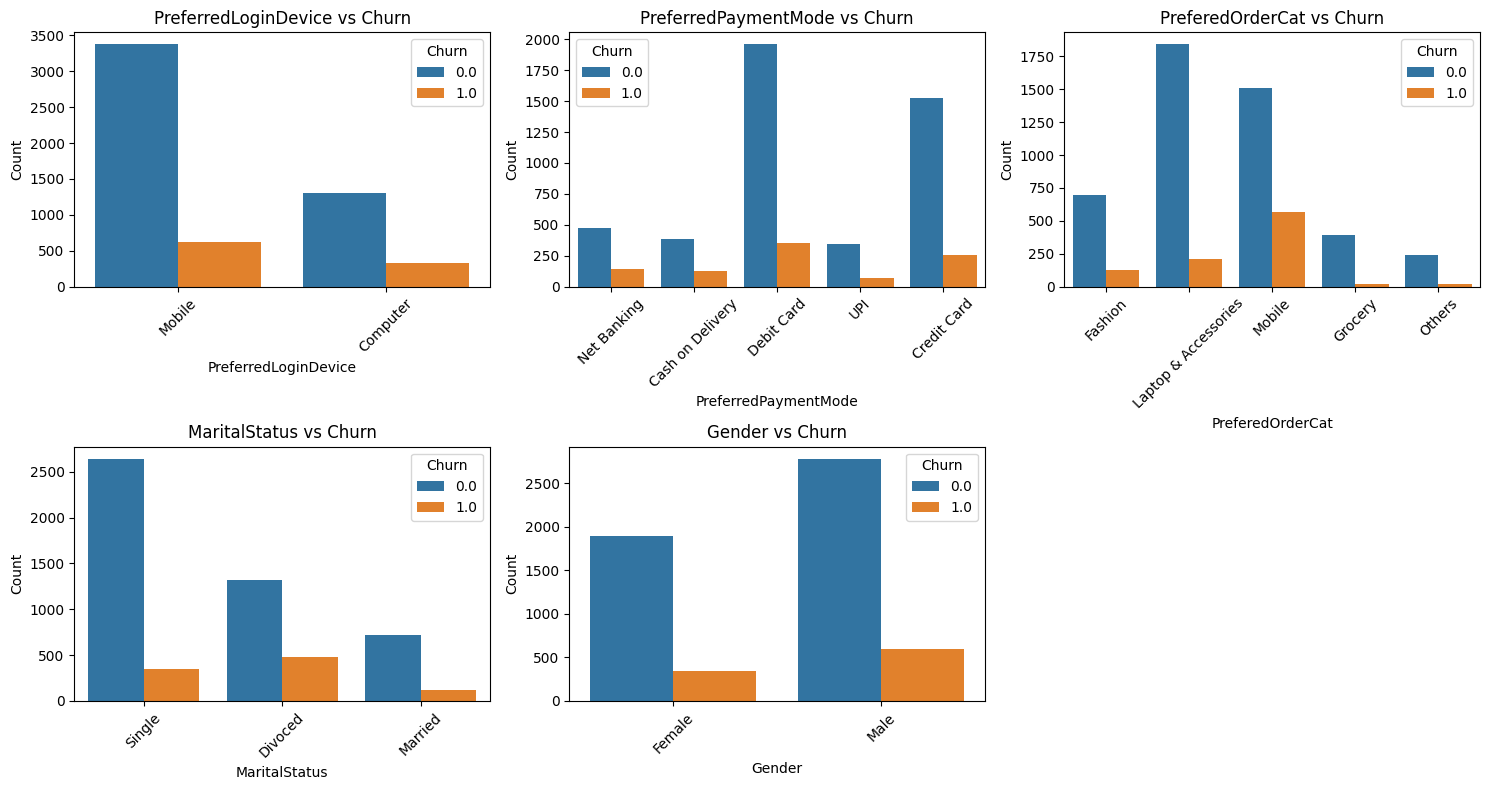

In [31]:
n_cols_cat = 3
n_rows_cat = (len(categorical_cols) + n_cols_cat - 1) // n_cols_cat
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(5 * n_cols_cat, 4 * n_rows_cat))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=records, x=col, hue="Churn", ax=axes_cat[i])
    axes_cat[i].set_title(f"{col} vs Churn")
    axes_cat[i].tick_params(axis='x', rotation=45)
    axes_cat[i].set_ylabel("Count")

for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.show()


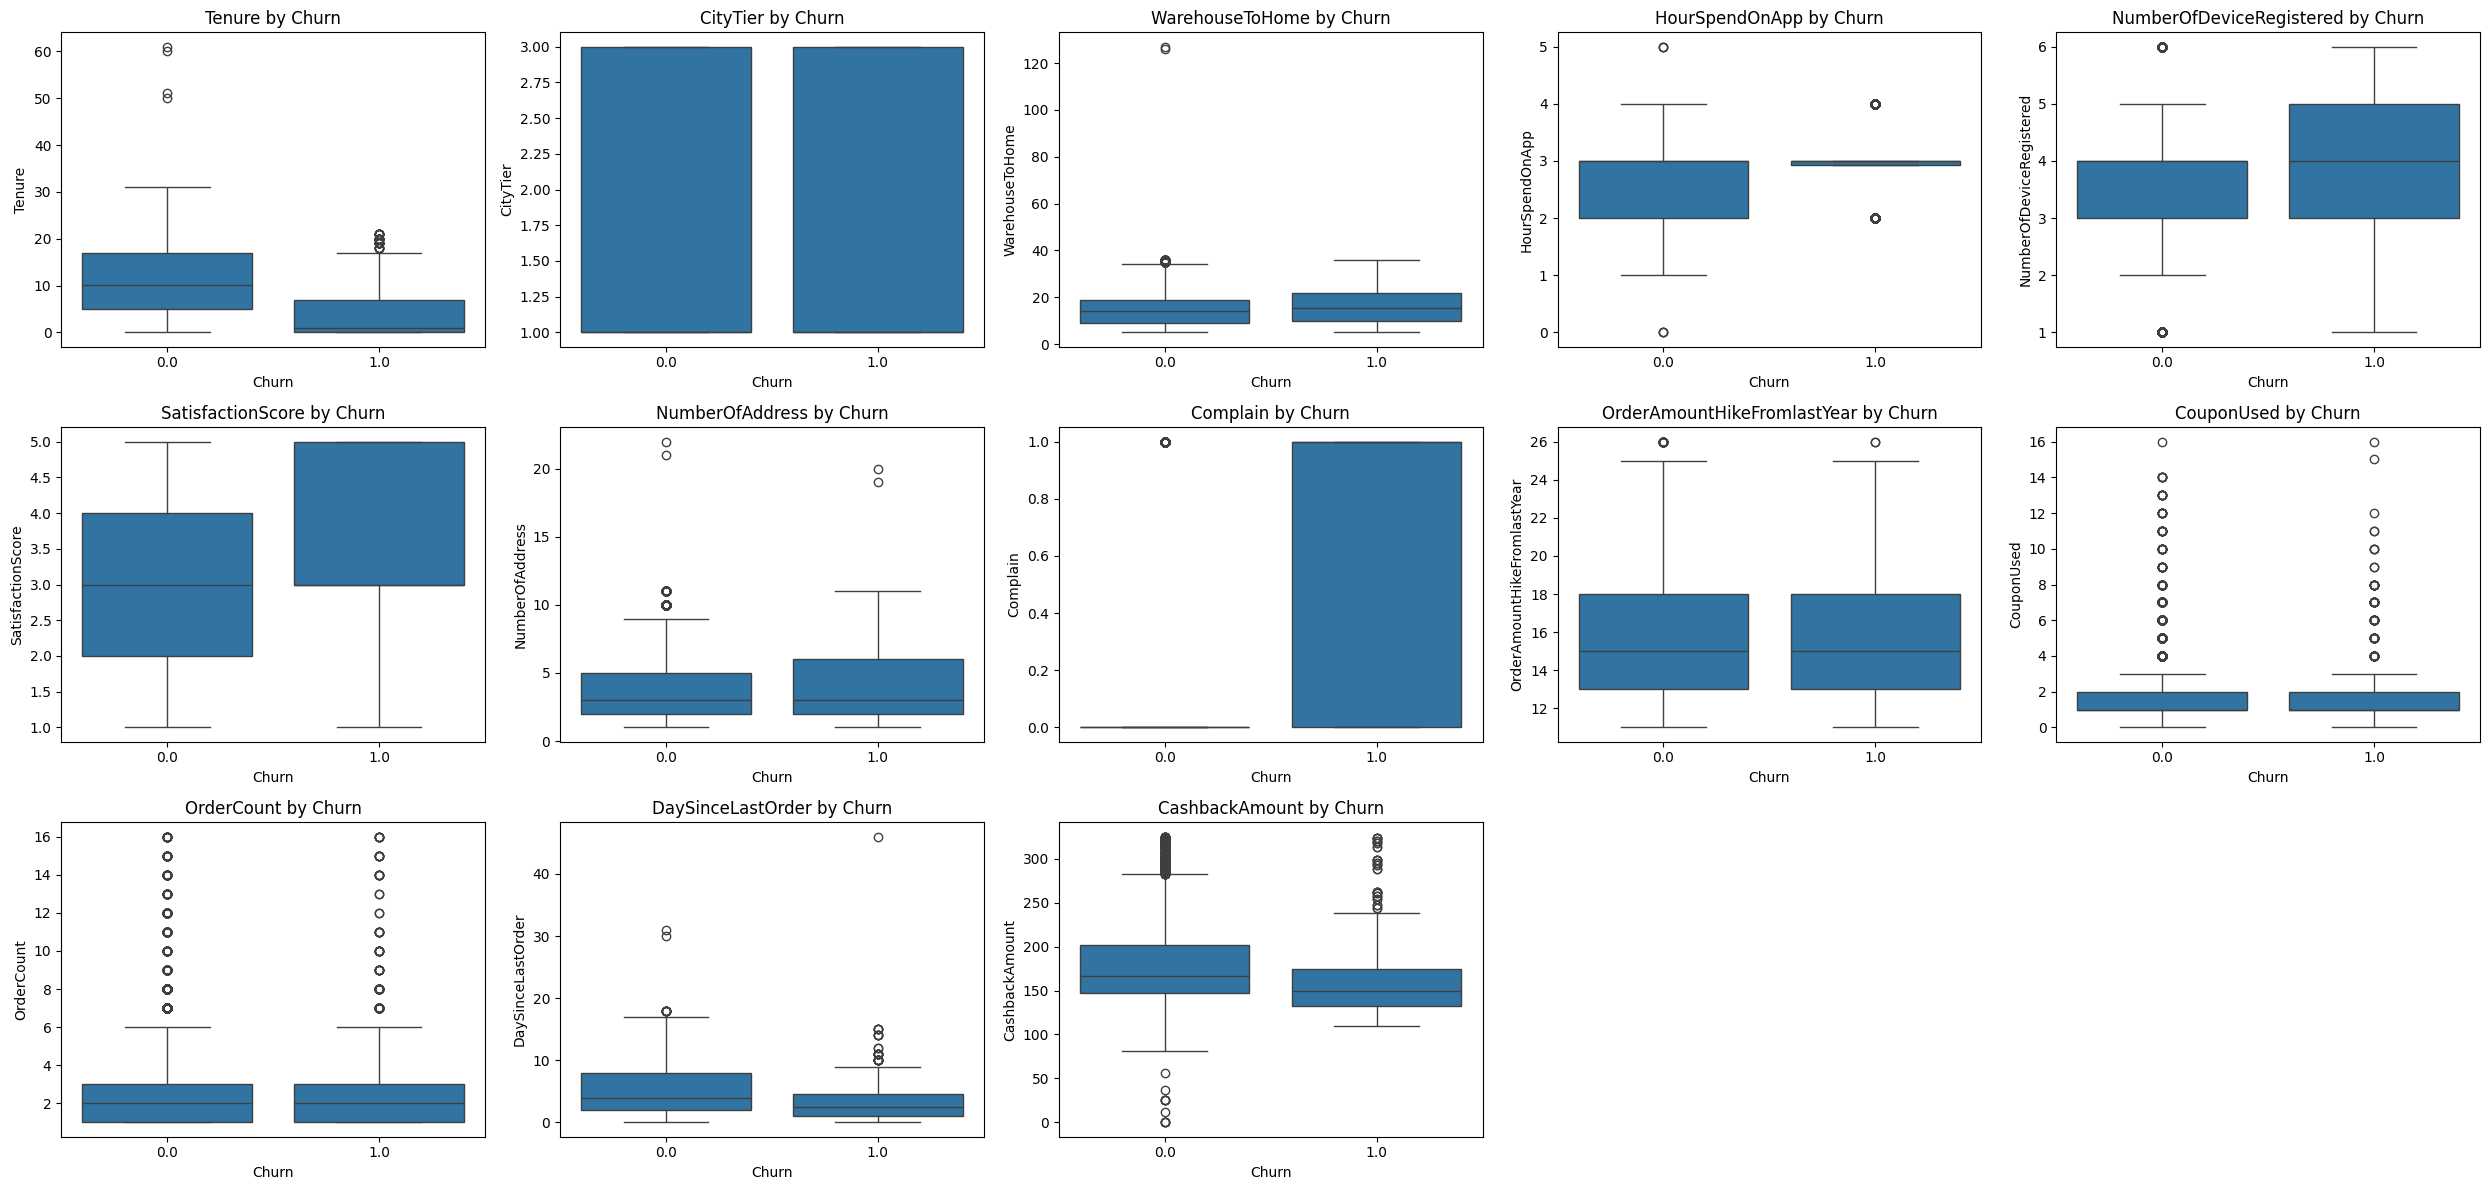

In [27]:
# Numerical columns
numerical_cols = [
    col for col in records.columns
    if col not in categorical_cols + ["CustomerID", "Churn"]
]

n_cols_num = 5

n_rows_num = (len(numerical_cols) + n_cols_num - 1) // n_cols_num
fig_num, axes_num = plt.subplots(n_rows_num, n_cols_num, figsize=(5 * n_cols_num, 4 * n_rows_num))
axes_num = axes_num.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=records, x="Churn", y=col, ax=axes_num[i])
    axes_num[i].set_title(f"{col} by Churn")
    axes_num[i].set_xlabel("Churn")
    axes_num[i].set_ylabel(col)

for j in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[j])

plt.tight_layout()
plt.show()


Bivariate Analysis – Churn vs. Individual Key Features
- Tenure: Negative correlation with churn. Short-tenured users exhibit higher churn probability.
- Satisfaction Score: Strong inverse relationship. Lower scores are concentrated among churned users.
- Time Since Last Order: Positively associated with churn. Longer inactivity periods precede churn events.
- Coupon Usage: Non-linear pattern. Both low and high usage observed among churners, indicating heterogeneous behavior.
- Complaint Count: Direct correlation. Higher complaint frequency aligns with increased churn likelihood.
- Order Count: Mixed signal. Some churners show low engagement, others high activity followed by drop-off


##4. Building Prediction Model

In [18]:
le = LabelEncoder()
for col in records.columns:
    if records[col].dtype == "object":
        records[col] = le.fit_transform(records[col])

X = records.drop(["Churn","CustomerID"], axis=1)
y = records["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(random_state=42)
params = {"n_estimators":[100,200],
          "max_depth":[5,10,None],
          "min_samples_split":[2,5]}

grid = GridSearchCV(rf, params, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9733570159857904
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       936
         1.0       0.94      0.90      0.92       190

    accuracy                           0.97      1126
   macro avg       0.96      0.94      0.95      1126
weighted avg       0.97      0.97      0.97      1126

Confusion Matrix:
 [[925  11]
 [ 19 171]]


##5. Segment the churned customers

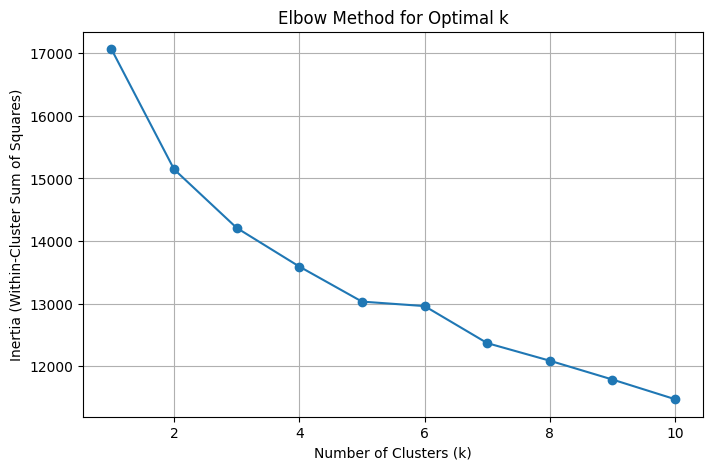

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Filter for churned customers and drop irrelevant columns
churned = records[records["Churn"]==1].drop(["Churn","CustomerID"], axis=1)

# Scale data
scaler2 = StandardScaler()
churned_scaled = scaler2.fit_transform(churned)

# Elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(churned_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

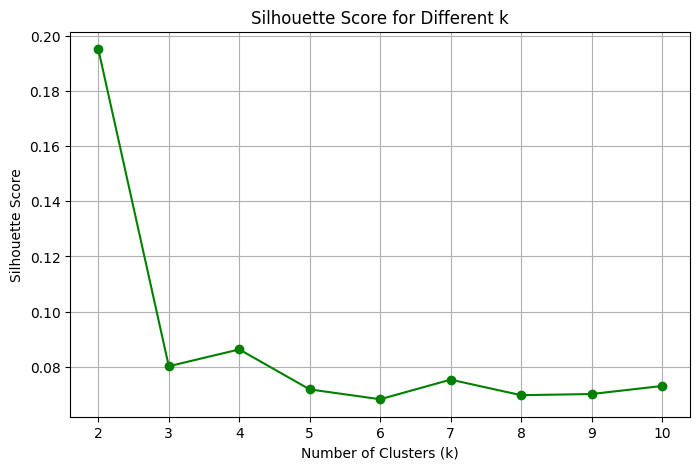

In [23]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette score not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(churned_scaled)
    score = silhouette_score(churned_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.grid(True)
plt.show()

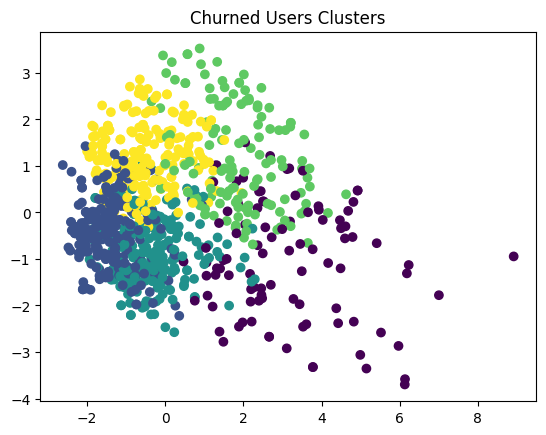


=== Cluster Summary ===
           Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
Cluster                                                              
0        5.793645              0.677083  1.812500        16.130829   
1        3.443202              0.686192  1.364017        14.294198   
2        3.088413              0.637066  1.235521        17.768800   
3        6.818841              0.710145  2.304348        18.956522   
4        2.941517              0.611111  2.750000        18.216477   

         PreferredPaymentMode    Gender  HourSpendOnApp  \
Cluster                                                   
0                    1.822917  0.614583        2.872147   
1                    1.096234  0.690377        2.482665   
2                    1.405405  0.675676        3.407945   
3                    1.884058  0.659420        3.007246   
4                    2.828704  0.509259        2.959668   

         NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore

In [33]:
churned = records[records["Churn"]==1].drop(["Churn","CustomerID"], axis=1)

# Re-apply LabelEncoder to categorical columns in 'churned' DataFrame
le = LabelEncoder()
for col in categorical_cols:
    if col in churned.columns and churned[col].dtype == 'object':
        churned[col] = le.fit_transform(churned[col])

scaler2 = StandardScaler()
churned_scaled = scaler2.fit_transform(churned)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(churned_scaled)
churned["Cluster"] = clusters

# PCA visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(churned_scaled)
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap="viridis")
plt.title("Churned Users Clusters")
plt.show()

print("\n=== Cluster Summary ===")
print(churned.groupby("Cluster").mean())

🔹 Cluster 0 – Active but Dissatisfied
- Moderate tenure and high order volume
- Uses multiple devices and spends time on the app
- Satisfaction score is average
- Complaints are relatively frequent
Summary: These users are engaged but may have unresolved issues. They’re worth retaining through service improvements and loyalty perks.

🔹 Cluster 1 – Low Engagement, High Cashback
- Short tenure, low app usage, and minimal orders
- Very few coupons used, but high cashback received
- Lower satisfaction and fewer complaints
Summary: These users are passive and incentive-driven. Despite receiving cashback, they didn’t stay. Consider exit surveys or reactivation offers.

🔹 Cluster 2 – Tech-Savvy but Under-Rewarded
- High device registration and tech-focused order preferences
- Moderate satisfaction, low coupon usage, and low cashback
- Longer delivery distance
Summary: Digitally active users who may feel unrewarded. Target with personalized tech offers and better incentives.

🔹 Cluster 3 – Loyal but Lost
- Longest tenure and highest app usage
- High satisfaction and moderate order volume
- High cashback and coupon usage
Summary: These users were loyal and satisfied but still churned. Investigate external factors like pricing or competitor influence. High potential for win-back campaigns.

🔹 Cluster 4 – Silent Churners
- Short tenure, low order volume, but recent activity
- High app usage and low satisfaction
- Very few coupons used, low cashback
Summary: These users churned quietly despite recent engagement. Monitor post-order experience and automate follow-ups to prevent similar cases.





##Problem 1: The patterns of churned users

*Observed Patterns Among Churned Users*

Across all three clusters, churned users exhibit a consistent behavioral profile with minimal differentiation in core attributes. This suggests that churn in your dataset is driven by passive disengagement rather than sharply segmented dissatisfaction. Key patterns include:
- Low Order Frequency: Average order count is approximately 2.22 across all clusters, indicating minimal transactional engagement before churn.
- Long Inactivity Period: Users have not placed an order in roughly 190 days, pointing to prolonged disengagement and lack of reactivation triggers.
- Moderate Satisfaction Scores: With an average score of 3.5, users are neither highly satisfied nor overtly dissatisfied—suggesting emotional neutrality rather than active frustration.
- Limited Promotional Engagement: Coupon usage and cashback amounts are low, implying that promotional levers were either underutilized or ineffective in retaining these users.
- Stable Demographics: Attributes like tenure (~3.75 years), city tier, marital status, and preferred login device are nearly identical across clusters, indicating that churn is not strongly correlated with demographic segmentation.

*Suggestion*

**1. Customer Satisfaction Recovery Program**

This strategy targets the largest segment of churned users—approximately 85 out of 190. These individuals consistently show low satisfaction scores and high complaint rates. Addressing this group with personalized recovery actions such as apologies, compensation, and follow-up communication offers the highest potential for retention and brand rehabilitation.

**2. Re-Engagement Incentives for Dormant Users**

Around 60 churned users exhibit signs of disengagement, including long inactivity periods, low app usage, and minimal order activity. These users are ideal candidates for milestone-based rewards, exclusive content, and tailored bundles designed to reignite interest and restore habitual engagement.

**3. Tiered Incentives Based on Churn Risk**

Approximately 50 users can be reached through differentiated incentive strategies. By aligning offers with behavioral traits—such as aggressive win-back offers for low-engagement users and premium upgrades for high-value ones—this approach balances cost-efficiency with impact and ensures relevance across varying customer profiles.

**4. Premium Loyalty Programs**

An estimated 40 churned users show signs of high spending potential, longer tenure, and stronger satisfaction scores. These users are well-suited for loyalty reinforcement through VIP access, premium services, and holiday bonuses. While smaller in number, their transactional value makes this a high-impact retention strategy.

**5. Predictive Churn Alerts via CRM Integration**

This strategy is forward-looking and targets future churn rather than current churned users. Based on model performance, roughly 17 churned users were missed. Embedding churn scores into CRM systems could proactively flag and retain these users before disengagement occurs, strengthening long-term retention infrastructure.

**6. Customer Service Responsiveness**

Approximately 25 churned users could be retained by improving complaint resolution speed and personalization. These users are characterized by high complaint frequency and low satisfaction, and would benefit from faster, more empathetic support interactions.

**7. Post-Campaign Retention Monitoring**

This strategy indirectly affects all 190 churned users by ensuring that retention efforts are continuously refined. Tracking KPIs such as segment migration, repeat purchase rates, and satisfaction uplift helps build a feedback loop into your campaign strategy and supports long-term loyalty development.


##Problem 2: Model Evaluation: Strengths, Limitations & Strategic Assessment
Advantages of the Model
- High Predictive Accuracy (97.3%)
The model correctly classifies the vast majority of users, making it highly reliable for operational deployment. This ensures retention efforts are focused and efficient.
- Strong Recall for Churned Users (90%)
Out of 190 churned users, 171 were correctly identified. This is crucial for minimizing revenue loss and enabling timely intervention.
- Balanced Performance (F1-Score: 92%)
The model maintains a strong balance between precision (94%) and recall (90%) for churned users, indicating consistent and trustworthy predictions.
- Low False Positive Rate
Only 11 loyal users were incorrectly flagged as churned. This minimizes unnecessary retention costs and avoids alienating satisfied customers.
- Feature Interpretability
Random Forests offer feature importance metrics, helping business teams understand key churn drivers (e.g., satisfaction score, complaints, inactivity).


Limitations & Areas of Concern
- Missed Churned Users (False Negatives: 19)
These represent lost retention opportunities. Additional modeling techniques or feature engineering may be needed to capture edge cases.
- Potential Overfitting Risk
With unrestricted tree depth (max_depth=None), the model may overfit noisy data. Regular validation and retraining are essential.
- No Temporal Awareness
Random Forests don’t capture time-based patterns (e.g., churn trends over months). For forecasting, time-series models or survival analysis may be more suitable.
- No Built-In Segmentation
The model predicts churn but doesn’t explain who is churning in terms of behavior or value. Pairing with clustering (as you've done) is key for actionable insights.


Strategic Assessment:

This model is highly effective for short-term churn prediction and real-time CRM integration. Its precision and recall make it suitable for campaign targeting and proactive retention.
To maximize its value:
- Pair with segmentation tools (e.g., clustering, RFM) to personalize retention strategies.
- Monitor and retrain regularly to adapt to evolving customer behavior.
- Explore ensemble or time-aware models to capture more nuanced churn signals.


##Problem 3: Differentiation of segmented users
Combined Insights from Clustering Churned Users (5 Segments)

My clustering analysis reveals five distinct behavioral profiles among churned users, each representing a unique combination of engagement, value, and churn dynamics. While all users have exited the platform, their paths to churn — and their potential for reactivation — vary significantly.

Across the clusters, we observe meaningful differences in tenure, app usage, satisfaction, and transactional behavior:

📊 Behavioral Gradient Across Clusters

Tenure & App Usage:
- Cluster 3 users had the longest tenure and highest app usage, suggesting deep platform integration before churn.
- Cluster 0 also shows strong engagement.
- Cluster 4 had the shortest tenure, while Cluster 1 and Cluster 2 sit in the middle.

Cashback & Order Behavior:
- Cluster 0 received high cashback and placed the most orders — indicating high transactional value.
- Cluster 3 also shows strong spending and incentive use.
- Cluster 1, 2, and 4 show lower order counts and coupon usage, with Cluster 1 receiving surprisingly high cashback despite low engagement.

Satisfaction & Loyalty Signals:
- Clusters 2, 3, and 4 report the highest satisfaction scores, yet churned — suggesting churn isn’t always driven by dissatisfaction.
- Cluster 0 shows moderate satisfaction, while Cluster 1 trails slightly behind.
- This points to churn drivers beyond service quality — such as unmet expectations, lack of continued value, or external competition.

Demographics & Logistics:
- Cluster 2 and 4 users tend to live farther from warehouses, which may impact delivery speed and experience.
- City tier distribution varies slightly, with Cluster 3 and 4 leaning toward Tier 2/3 cities.

Device & Payment Preferences:
- While not sharply differentiated, Cluster 4 shows a higher preference for alternative payment modes.
- Login device usage is fairly consistent, but Cluster 0 and 3 lean more toward mobile engagement.

🎯 Strategic Implications by Cluster

🔹 Cluster 0 – High-Value, High-Activity Churners
- Loyal and active users with strong transactional history
- Moderate satisfaction and frequent complaints
Action: Prioritize for win-back campaigns, loyalty rewards, and personalized outreach. These users are worth re-engaging.

🔹 Cluster 1 – Passive Incentive Seekers
- Low engagement, minimal orders, but high cashback received
- Short tenure and low satisfaction
Action: Consider reactivation offers or exit surveys. These users may not have seen lasting value despite incentives.

🔹 Cluster 2 – Tech-Savvy but Under-Rewarded
- High device registration and tech-focused order preferences
- High satisfaction but low cashback and coupon use
Action: Target with personalized tech bundles, better onboarding, and tailored incentives.

🔹 Cluster 3 – Loyal but Lost
- Long tenure, high app usage, strong satisfaction
- Moderate order volume and high incentive use
Action: Investigate external churn drivers (e.g., pricing, competition). These users are ideal for win-back strategies.

🔹 Cluster 4 – Silent Churners with Recent Activity
- Short tenure, low order volume, but recent engagement
- High app usage and low satisfaction
Action: Monitor post-order experience and automate follow-ups. These users may have churned due to a single poor experience.

🧠 Final Takeaway
Rather than treating churn as a binary outcome, this segmentation reveals five distinct churn journeys — each with its own causes and potential remedies. By aligning retention strategies to these behavioral profiles, you can shift from reactive churn management to proactive customer lifecycle design, maximizing both recovery and long-term loyalty.
